In [1]:
import easyocr
import os
import cv2
import matplotlib.pyplot as plt

reader = easyocr.Reader(['en'])

In [2]:
project_dir = os.path.dirname(os.getcwd())
source_dataset_location = f"{project_dir}/data/roboflow_dataset/test/images"
cropped_dataset_location = f"{project_dir}/data/roboflow_dataset/cropped_plates"
results_dir = f"{project_dir}/data/roboflow_dataset/output_results"
scale_dataset_location = f"{project_dir}/data/roboflow_dataset/scaled_plates"
cropped_dataset_location

'/home/roma/5sem/Real-time_Number_Plate_Recognition/data/roboflow_dataset/cropped_plates'

In [3]:
os.makedirs(results_dir, exist_ok=True)
os.makedirs(scale_dataset_location, exist_ok=True)

for img_file in os.listdir(cropped_dataset_location):
    if img_file.endswith('jpg'):
        img_path = os.path.join(cropped_dataset_location, img_file)

        img = cv2.imread(img_path)

        scale_factor = 2
        img = cv2.resize(img, (0, 0), fx=scale_factor, fy=scale_factor)
        img = cv2.GaussianBlur(img,(5,5),0)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        output_path = os.path.join(scale_dataset_location, img_file)
        cv2.imwrite(output_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

        result = reader.readtext(output_path)
    
        output_txt_path = os.path.join(results_dir, img_file[:-3]+'txt')
        with open(output_txt_path, 'w') as f:
            for (bbox, text, prob) in result:
                f.write(f'Text: {text}, Probability: {prob}\n')

        

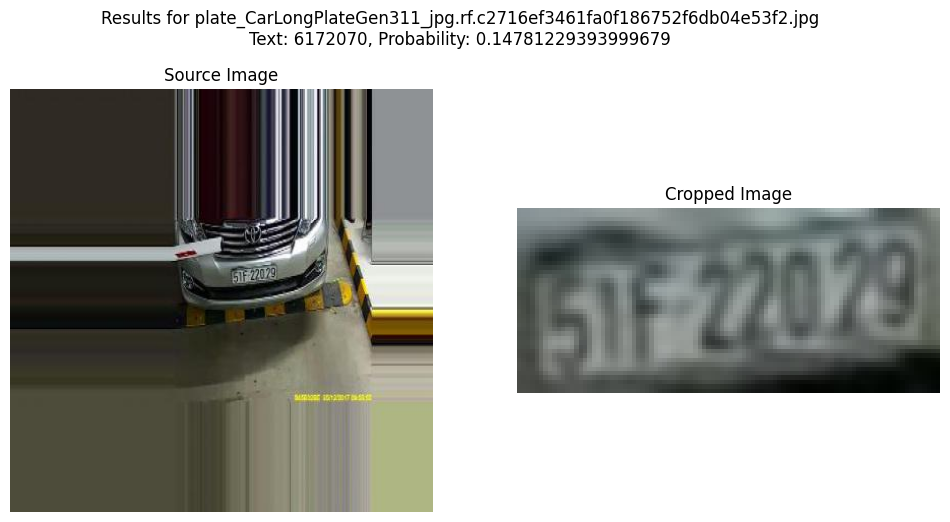

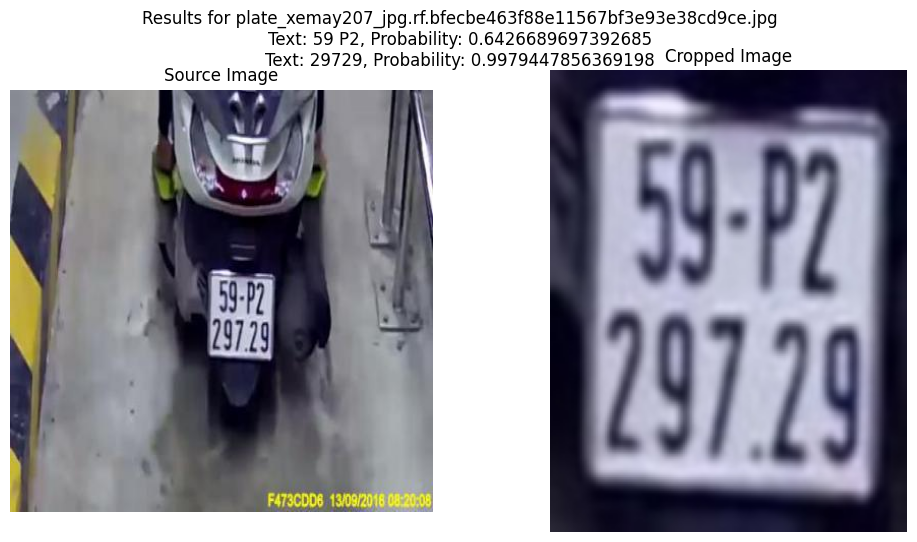

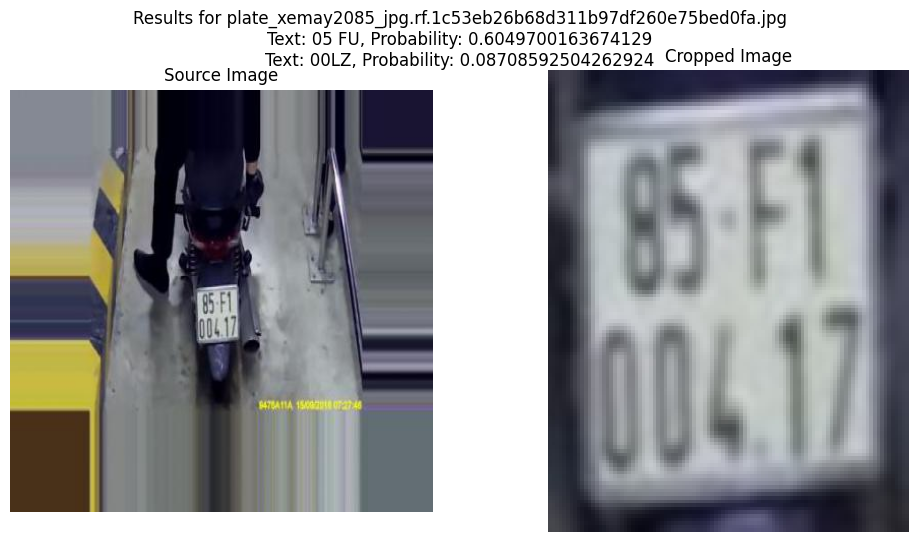

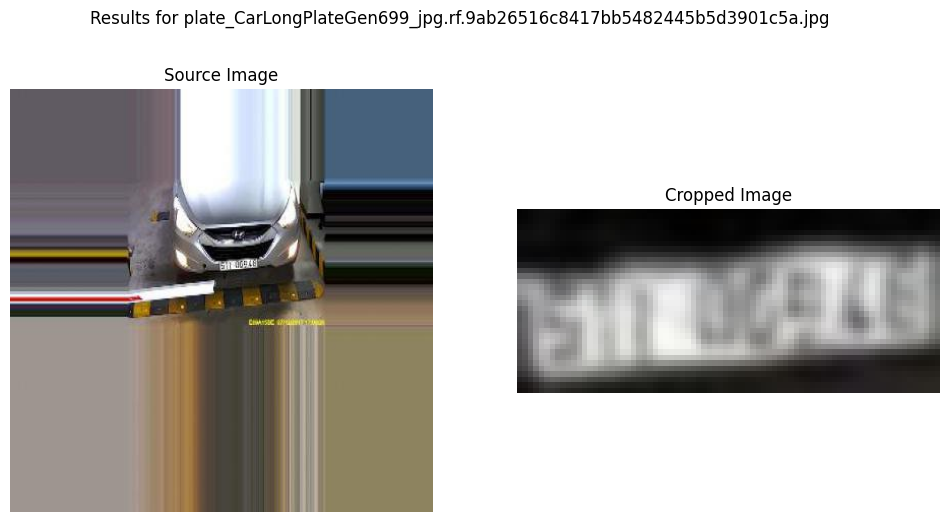

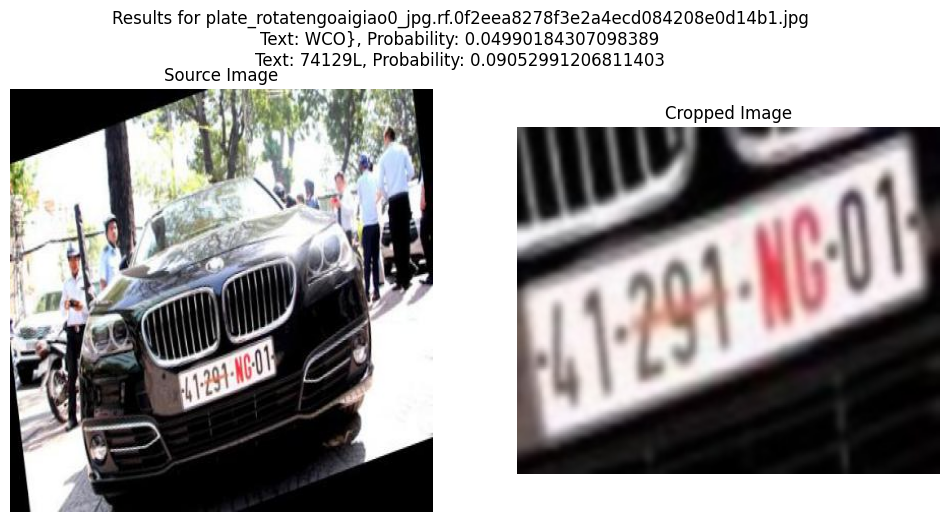

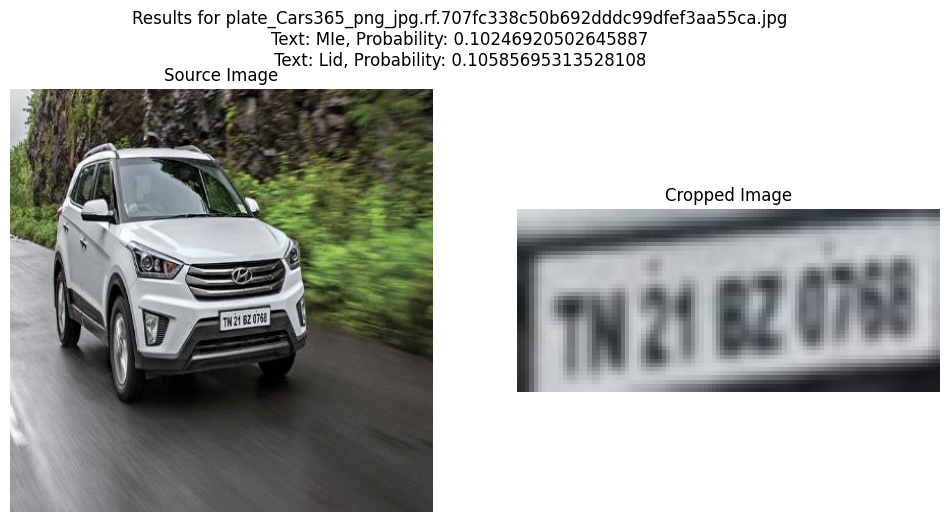

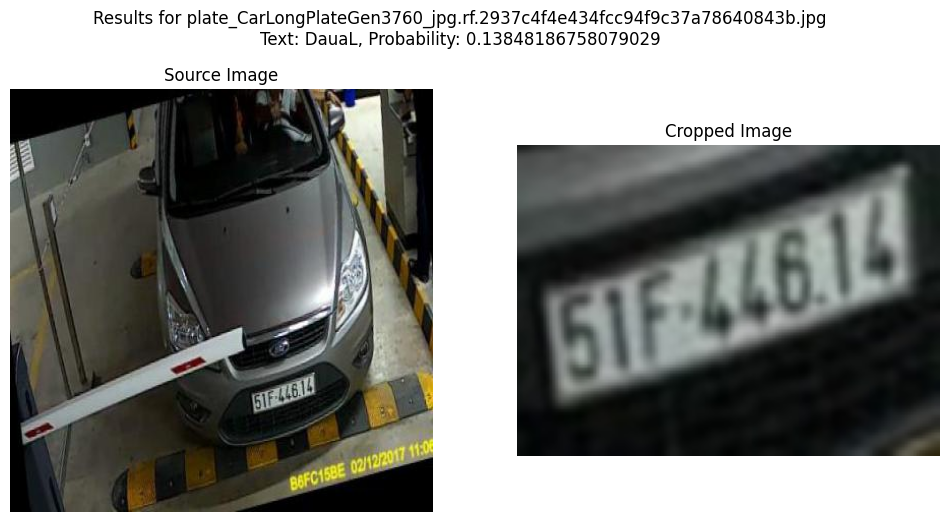

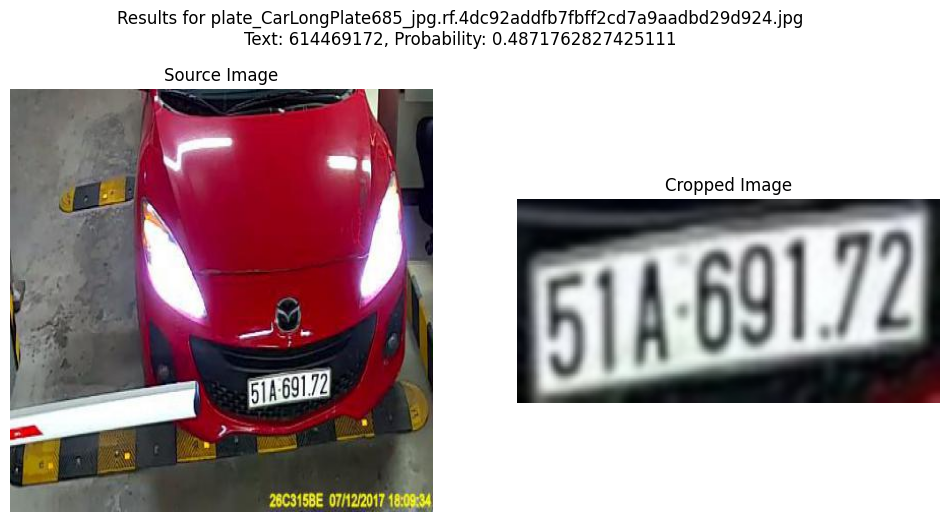

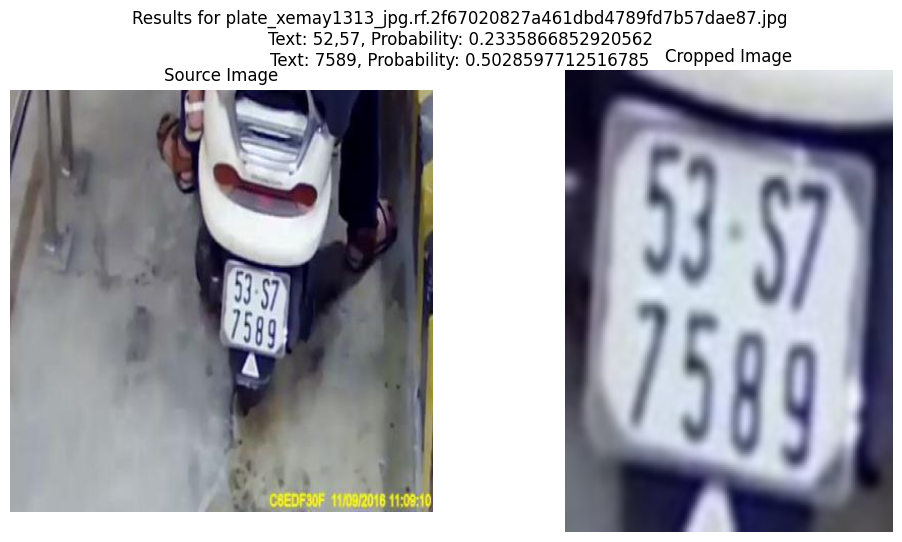

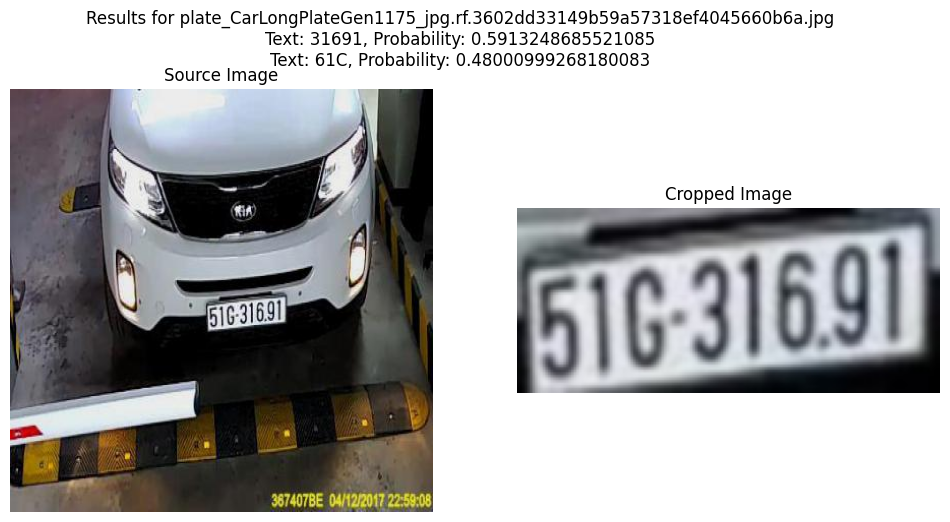

In [4]:
first_dataset = source_dataset_location
second_dataset = scale_dataset_location

for img_file in os.listdir(second_dataset)[:10]:
    if img_file.endswith('jpg'):
        cropped_img_path = os.path.join(second_dataset, img_file)
        source_img_path = os.path.join(first_dataset, img_file[6:])
        results_path = os.path.join(results_dir, img_file[:-3]+'txt')

        cropped_img = cv2.imread(cropped_img_path)
        source_img = cv2.imread(source_img_path)
        cropped_img_rgb = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
        source_img_rgb = cv2.cvtColor(source_img, cv2.COLOR_BGR2RGB)
        
        with open(results_path, 'r') as f:
            results = f.read()
        
        # Plot images and results
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        axes[0].imshow(source_img_rgb)
        axes[0].set_title('Source Image')
        axes[0].axis('off')
        
        axes[1].imshow(cropped_img_rgb)
        axes[1].set_title('Cropped Image')
        axes[1].axis('off')
        
        plt.suptitle(f'Results for {img_file}\n{results}', fontsize=12)
        plt.show()